In [ ]:
import pandas as pd
from os import path
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
def tensor_string_to_list(x):
  tensor_string = x.split(",")
  tensor = [float(d.strip()) for d in tensor_string[1:-1]]
  tensor.insert(0, float(tensor_string[0].strip("tensor([").strip()))
  tensor.append(float(tensor_string[-1].strip("])").strip()))

  return tensor

In [ ]:
stopwords = pd.read_json(f"/content/gdrive/My Drive/CroLyrics_data/stopwords-hr.json")

In [ ]:
stopwords = list(stopwords.iloc[:,0].values)

In [ ]:
df_info = pd.read_csv(f"/content/gdrive/My Drive/CroLyrics_data/info_for_scraping.csv")

In [ ]:
df_embedded = pd.DataFrame()

for artist_name in df_info.artist_name:
  file_path = f"/content/gdrive/My Drive/CroLyrics_data/{artist_name}_final_lyrics_embedded.csv"
  if path.exists(file_path):
    df_embedded = df_embedded.append(pd.read_csv(file_path))


In [ ]:
df_embedded.reset_index(drop=True, inplace=True)
df_embedded["embedded_lyrics_list"] = df_embedded["embedded_lyrics"].apply(lambda x: tensor_string_to_list(x))

In [ ]:
embeddings_matrix = list(df_embedded["embedded_lyrics_list"])

In [ ]:
distances = euclidean_distances(np.array(embeddings_matrix))

In [ ]:
len(df_embedded)

4363

In [ ]:
song_index = 2825

order = distances[song_index].argsort()
ranks = order.argsort()
df_embedded.loc[song_index].Lyrics

"Još je jedno prazno veče, s tobom dragi iza nas. Naše večere uz svijeće, uvijek su u krivi čas. Opet ostala sam sama, s istom laži da ćeš doć. Blijedo svjetlo apartmana, iza tebe guta noć. I dok razmišljam o nama, sve su crnje misli te, dal' ćeš shvatit jednog dana, da je uzalud nam sve. Kad te sretnem i kad šutim, još te možda želim, znaj. Al' u srcu ipak slutim, da je za nas bolji kraj."

In [ ]:
most_similar = np.where(ranks == 1)[0][0]

df_embedded.loc[most_similar].Lyrics

'Jos je noc, a tvoj brod vec u luci, to je cas kada znam, osjecas strah, putovanja su ta uvijek duga, a vrijeme nas mijenja sve. Moje suze su znak da te volim, i da isto je sve kao i prije, da sam sretna jer znam, da se vracas zbog nas, i putem sanjas ovaj dan. I dok plovis, znaj, ja sam sama, cijelu noc bdijem jer plasi me mrak, bezbroj puta se ponovno molim, da vrati te sunca zrak'

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(distances)
kmeans.labels_

clusters = kmeans.predict(distances)

In [ ]:
df_embedded["Cluster"] = clusters

In [ ]:
df_embedded["Cluster"].value_counts()

3    1389
2    1166
0     804
1     676
4     328
Name: Cluster, dtype: int64

In [ ]:
df_embedded["Artist_ID"] = df_embedded["Song_ID"].str.split("_").map(lambda x: x[0])

In [ ]:
df_info.artist_name.sort_values()

18                       Aerodrom
22                         Baruni
30                   Bijelo Dugme
43                 Boris Novković
12                        Colonia
2                   Crvena Jabuka
9             Danijela Martinović
37                   Darko Rundek
7                  Doris Dragović
3                         Gibonni
27                        Haustor
38                    Hladno Pivo
26                 Jacques Houdek
42                 Jasmin Stavros
24                   Jasna Zlokić
29                           Jole
28                   Josipa Lisac
5                    Leteći Odred
34                   Luka Nižetić
45                        Magazin
17                     Maja Šuput
44             Maja Šuput & EnJoy
40                     Mate Bulić
19                 Miroslav Škoro
0                      Mišo Kovač
39                 Mladen Grdović
21    Najbolji Hrvatski Tamburaši
33                    Nina Badrić
13                    Novi Fosili
11            

In [ ]:
df = pd.DataFrame()
df_lyrics = pd.DataFrame()

for artist_name in df_info.artist_name:
  nlp_file_path = f"/content/gdrive/My Drive/CroLyrics_data/{artist_name}_nlp.csv"
  if path.exists(nlp_file_path):
    df_nlp = pd.read_csv(nlp_file_path)
    
    df_lyrics = df_lyrics.append(pd.read_csv(f"/content/gdrive/My Drive/CroLyrics_data/{artist_name}_final_lyrics.csv"))
    df = df.append(df_nlp)

In [ ]:
df = df[df["lemma"] != "´"].reset_index(drop=True)

In [ ]:
df["lemma"] = df.lemma.astype(str)

In [ ]:
len(df.Song_ID.unique())

4363

In [ ]:
df_main_words = df[df.upos.isin(["ADV", "PRON", "ADJ", "NOUN", "VERB", "PROPN"])]
df_main_words.reset_index(drop=True, inplace=True)

In [ ]:
len(df_main_words.Song_ID.unique())

4360

In [ ]:
 df[~df.Song_ID.isin(df_main_words.Song_ID.unique())]

,id,text,lemma,upos,xpos,feats,head,deprel,misc,ner,Song,Song_ID,Degree,Case,Number,Person,PronType,Mood,Tense,VerbForm,Gender,Number[psor],Poss,Definite,Polarity,Reflex,Voice,Foreign,NumType,Animacy,Gender[psor]
226745,1,Sometimes,Sometimes,X,Xf,Foreign=Yes,0,root,NaN,O,Time,QUgrhjBj_1_145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN
226746,2,when,when,X,Xf,Foreign=Yes,1,compound,NaN,O,Time,QUgrhjBj_1_145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN
226747,3,things,things,X,Xf,Foreign=Yes,1,compound,SpaceAfter=No,O,Time,QUgrhjBj_1_145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN
226748,4,",",",",PUNCT,Z,NaN,5,punct,NaN,O,Time,QUgrhjBj_1_145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226749,5,go,go,X,Xf,Foreign=Yes,1,flat:foreign,NaN,O,Time,QUgrhjBj_1_145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515837,8,.,.,PUNCT,Z,NaN,3,punct,NaN,O,Marihuana,0X3VJo7g_1_43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515838,1,We,we,X,Xf,Foreign=Yes,0,root,NaN,O,Marihuana,0X3VJo7g_1_43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN
515839,2,have,have,X,Xf,Foreign=Yes,1,punct,NaN,O,Marihuana,0X3VJo7g_1_43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN
515840,3,marijuana,marijuana,X,Xf,Foreign=Yes,1,compound,NaN,O,Marihuana,0X3VJo7g_1_43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN


In [ ]:
df["lemma_lyrics"] = df.groupby("Song_ID")["lemma"].transform(lambda x: ' '.join(x))


In [ ]:
df_main_words["lemma_lyrics"] = df_main_words.groupby("Song_ID")["lemma"].transform(lambda x: ' '.join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
grouped_df = df.drop_duplicates(subset=["Song_ID"])
grouped_df_main_words = df_main_words.drop_duplicates(subset=["Song_ID"])

In [ ]:
df_unique_lemmas = df.drop_duplicates(subset=["lemma", "Song_ID"]).reset_index(drop=False)

locations = df_unique_lemmas[(df_unique_lemmas["ner"].isin(["B-LOC", "I-LOC"])) & (df_unique_lemmas["upos"]=="PROPN")]["lemma"].value_counts()
names = df_unique_lemmas[(df_unique_lemmas["ner"].isin(["B-PER", "I-PER"])) & (df_unique_lemmas["upos"]=="PROPN")]["lemma"].value_counts()
organizations = df_unique_lemmas[(df_unique_lemmas["ner"].isin(["B-ORG", "I-ORG"])) & (df_unique_lemmas["upos"]=="PROPN")]["lemma"].value_counts()
nouns = df_unique_lemmas[(df_unique_lemmas.upos=="NOUN")]["lemma"].value_counts()
verbs = df_unique_lemmas[(df_unique_lemmas.upos=="VERB")]["lemma"].value_counts()
adjectives = df_unique_lemmas[(df_unique_lemmas.upos=="ADJ")]["lemma"].value_counts()
adverbs = df_unique_lemmas[(df_unique_lemmas.upos=="ADV")]["lemma"].value_counts()



In [ ]:

def has_feature(df, id, lemmas, features, threshold):
  has_feature_ =  [(feature in lemmas)/counts for feature, counts in zip(features[features>threshold].index, features[features>threshold].values)]
  #has_feature_ =  [(feature in lemmas) for feature in features[features>threshold].index]
  #has_feature_ =  [np.sum([l==feature for l in lemmas])/counts for feature, counts in zip(features[features>threshold].index, features[features>threshold].values)]

  df.loc[song_id, features[features>threshold].index] = has_feature_

In [ ]:
features_df = pd.DataFrame()
song_ids = grouped_df_main_words.Song_ID.unique()
for song_id in song_ids:
  lemmas = grouped_df_main_words[grouped_df_main_words.Song_ID == song_id]["lemma_lyrics"].values[0].split()

  has_feature(features_df, song_id, lemmas, locations, 5)
  has_feature(features_df, song_id, lemmas, organizations, 5)
  has_feature(features_df, song_id, lemmas, names, 5)

  has_feature(features_df, song_id, lemmas, nouns, 5)
  has_feature(features_df, song_id, lemmas, verbs, 5)
  has_feature(features_df, song_id, lemmas, adverbs, 5)
  has_feature(features_df, song_id, lemmas, adjectives, 5)

In [ ]:
lyrics_length = df_lyrics[df_lyrics.Song_ID.isin(features_df.index)]["Lyrics"].map(lambda x: len(x)).reset_index(drop=True)

In [ ]:
lyrics_length_norm = lyrics_length - min(lyrics_length)
lyrics_length_norm = lyrics_length_norm/max(lyrics_length_norm)
lyrics_length_norm*0.1

0       0.012808
1       0.008649
2       0.018031
3       0.009448
4       0.017731
          ...   
3364    0.011610
3365    0.014604
3366    0.013440
3367    0.020193
3368    0.008084
Name: Lyrics, Length: 3369, dtype: float64

In [ ]:
df_short = features_df.copy()[0:8]
for row in df_short.iterrows():

  lemmas_in_song = row[1].index[row[1]>0]
  lemmas_weight = row[1].values[row[1]>0]
  #lemmas_weight = lemmas_weight-min(lemmas_weight)
  #lemmas_weight = lemmas_weight/max(lemmas_weight)
  lemmas_weight_norm = lemmas_weight/lemmas_weight.sum()

  #sum_shared_lemmas = (features_df[lemmas_in_song]*lemmas_weight_norm).sum(axis=1)
  sum_shared_lemmas = (features_df[lemmas_in_song]).sum(axis=1)
  #sum_shared_lemmas = ((features_df[lemmas_in_song]>0)*lemmas_weight_norm).sum(axis=1)

  sum_shared_lemmas = sum_shared_lemmas-lyrics_length_norm.values*0.1
  sum_shared_lemmas = sum_shared_lemmas-lyrics_length_norm.values*0.1

  similar_songs = sum_shared_lemmas.sort_values(ascending=False)
  most_similar_song = similar_songs.index[1] if similar_songs.index[0] == row[0] else similar_songs.index[0]

  print(df_lyrics[df_lyrics.Song_ID==row[0]].reset_index().loc[0, "Lyrics"])
  print(df_lyrics[df_lyrics.Song_ID==most_similar_song].reset_index().loc[0, "Lyrics"])

  test_song_features = features_df[features_df.index==most_similar_song][row[1].index[row[1]>0]].sum()
  print(similar_songs[1])
  print(test_song_features[test_song_features>0].index)
  print("XXXXXX")



Daleko, od mene, daleko si, dome moj, o, draga, daleko, daleko je zivot moj. Ti ne znas da placem, da placem zbog tebe ja, ti ne znas da mislim, da mislim na tebe ja. A kad se tebi opet vratim, ja bit cu samo, samo tvoj, proci ce ovi pusti dani, uz tebe bit ce zivot moj. Jos malo tih dana, jos malo, dugo to traje, jos malo tih noci, bez tebe ne zelim dalje. U svakom si danu, i noci zivota mog, u svakom se trenu, ja sjecam tog lika tvog. Uz tebe bit ce zivot moj
Ima dana na te ne mislim. Život stisne, pa zaboravim. Al' u srcu uvik tvoj je lik. Još se nadam, vratit ćeš se ti. Kažu da se nisi ljutila. O meni si lipo pričala. Kažu suzu tek bi pustila. Kad si za me di god dočula. . Da sam imo šaku dukata. Da mi nije duša bećarska. Uz tebe bi bio cili vik. Sad je kasno, al' oprosti mi
0.01916493696266356
Index(['dan', 'život', 'lik', 'vratiti', 'misliti', 'pustiti', 'još'], dtype='object')
XXXXXX
Jednom ces shvatiti, da smo se voljeli, snove o ljubavi, mozda si sad izgubila ti. Jednom ces pi

In [ ]:
features_df["Artist_ID"] = features_df.index.str.split("_").map(lambda x: x[0])

In [ ]:
features_df_artist = features_df.groupby("Artist_ID").sum()

In [ ]:
features_df_artist.head()

,Hrvatska,Sava,Zagreb,Jadran,Dunav,Slavonija,Dalmacija,Bosna,Sarajevo,Split,Amerika,Hvar,Mostar,Neretva,Vukovar,Drava,Beograd,Marjan,Osijek,Istra,Pariz,Hajduk,Bog,Hrvat,Marija,Isus,Ana,Krist,Bogo,Tito,Ivo,Duje,Ante,Ivan,ljubav,srce,dan,život,noć,duša,...,zvjezdan,okupati,ženski,vezan,bećarski,mamuran,tmuran,radni,životan,riđati,predivan,rujan,biserni,nesritan,dalmatinski,nizak,gradski,sklon,zabraniti,poslednji,momački,strog,spor,odan,kućni,neobičan,gadan,sudnji,ulični,bidan,moćan,stoti,polustan,četvrti,litnji,prevelik,sunčev,sumoran,školski,odabrati
Artist_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
+RXzsM0Y,0.000000,0.043478,0.090909,0.000000,0.05,0.058824,0.000000,0.066667,0.0,0.000000,0.000000,0.0,0.333333,0.666667,0.0,0.0,0.0,0.000000,0.142857,0.166667,0.0,0.000000,0.036254,0.000000,0.000000,0.000000,0.1,0.0,0.0,0.0,0.285714,0.166667,0.166667,0.0,0.019281,0.024064,0.021763,0.030848,0.030928,0.033094,...,0.0,0.000000,0.142857,0.000000,0.0,0.142857,0.000000,0.000000,0.000000,0.0,0.000000,0.166667,0.0,0.0,0.0,0.000000,0.000000,0.166667,0.166667,0.0,0.0,0.0,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.0,0.000000,0.0,0.000000,0.166667,0.0,0.0,0.0,0.0,0.000000
/gYDFxB8,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.009063,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.019281,0.016043,0.011970,0.012853,0.016753,0.020144,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
/kSKwa9Q,0.000000,0.043478,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.012085,0.000000,0.000000,0.000000,0.1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.028922,0.022282,0.023939,0.014139,0.029639,0.015827,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.166667,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.166667
0X3VJo7g,0.000000,0.000000,0.090909,0.000000,0.00,0.058824,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.024169,0.043478,0.095238,0.000000,0.0,0.0,0.0,0.0,0.142857,0.000000,0.000000,0.0,0.005259,0.008913,0.030468,0.020566,0.009021,0.011511,...,0.0,0.285714,0.000000,0.000000,0.0,0.000000,0.000000,0.428571,0.000000,0.0,0.166667,0.000000,0.0,0.0,0.0,0.166667,0.166667,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.000000,0.0,0.166667,0.0,0.166667,0.000000,0.0,0.0,0.0,0.0,0.166667
538Exp8s,0.030303,0.043478,0.045455,0.047619,0.00,0.000000,0.058824,0.000000,0.0,0.214286,0.083333,0.0,0.000000,0.000000,0.0,0.0,0.0,0.428571,0.000000,0.000000,0.0,0.083333,0.075529,0.000000,0.047619,0.076923,0.0,0.0,0.3,0.0,0.000000,0.333333,0.333333,0.0,0.057844,0.055258,0.032644,0.035990,0.052835,0.033094,...,0.0,0.000000,0.000000,0.142857,0.0,0.000000,0.285714,0.000000,0.166667,0.0,0.000000,0.000000,0.0,0.0,0.0,0.166667,0.000000,0.166667,0.333333,0.0,0.0,0.0,0.000000,0.166667,0.000000,0.333333,0.166667,0.000000,0.000000,0.000000,0.0,0.166667,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000


In [ ]:
len(features_df_artist)

34

In [ ]:
df_lyrics["Artist_ID"] = df_lyrics["Song_ID"].str.split("_").map(lambda x: x[0])
df_lyrics["Artist_Lyrics"] = df_lyrics[df_lyrics["Artist_ID"].isin(features_df_artist.index)].groupby("Artist_ID")["Lyrics"].transform(lambda x: ' '.join(x))
lyrics_length_artist = df_lyrics.drop_duplicates(subset=["Artist_ID"]).sort_values(by="Artist_ID")["Artist_Lyrics"].map(lambda x: len(x))

array([ 38704,  24904,  47693,  71408, 109959,  47686,  58312,  90739,
        15737,  47380,  85694, 118579,  13717,  32355,  31109,  14174,
        49590,  86908, 104465, 115469,  19895,  59596,  71971,  21731,
        59583,  24094,  36754,  20880,  81129, 156916,  64463,  44308,
        43799,  71183])

In [ ]:
lyrics_length_artist_norm = lyrics_length_artist - min(lyrics_length_artist)
lyrics_length_artist_norm = lyrics_length_artist_norm/max(lyrics_length_artist_norm)
lyrics_length_artist_norm*0.1

0    0.017449
0    0.007812
0    0.023726
0    0.040287
0    0.067209
0    0.023722
0    0.031142
0    0.053787
0    0.001411
0    0.023508
0    0.050264
0    0.073228
0    0.000000
0    0.013015
0    0.012145
0    0.000319
0    0.025051
0    0.051111
0    0.063372
0    0.071056
0    0.004314
0    0.032039
0    0.040680
0    0.005596
0    0.032030
0    0.007247
0    0.016087
0    0.005002
0    0.047076
0    0.100000
0    0.035437
0    0.021363
0    0.021007
0    0.040130
Name: Artist_Lyrics, dtype: float64

In [ ]:
features_df_artist

,Hrvatska,Sava,Zagreb,Jadran,Dunav,Slavonija,Dalmacija,Bosna,Sarajevo,Split,Amerika,Hvar,Mostar,Neretva,Vukovar,Drava,Beograd,Marjan,Osijek,Istra,Pariz,Hajduk,Bog,Hrvat,Marija,Isus,Ana,Krist,Bogo,Tito,Ivo,Duje,Ante,Ivan,ljubav,srce,dan,život,noć,duša,...,zvjezdan,okupati,ženski,vezan,bećarski,mamuran,tmuran,radni,životan,riđati,predivan,rujan,biserni,nesritan,dalmatinski,nizak,gradski,sklon,zabraniti,poslednji,momački,strog,spor,odan,kućni,neobičan,gadan,sudnji,ulični,bidan,moćan,stoti,polustan,četvrti,litnji,prevelik,sunčev,sumoran,školski,odabrati
Artist_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
+RXzsM0Y,0.000000,0.043478,0.090909,0.000000,0.05,0.058824,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.333333,0.666667,0.000,0.000,0.000000,0.000000,0.142857,0.166667,0.000000,0.000000,0.036254,0.000000,0.000000,0.000000,0.1,0.0,0.0,0.000000,0.285714,0.166667,0.166667,0.000000,0.019281,0.024064,0.021763,0.030848,0.030928,0.033094,...,0.000000,0.000000,0.142857,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.0,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000
/gYDFxB8,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009063,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.019281,0.016043,0.011970,0.012853,0.016753,0.020144,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
/kSKwa9Q,0.000000,0.043478,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012085,0.000000,0.000000,0.000000,0.1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.028922,0.022282,0.023939,0.014139,0.029639,0.015827,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667
0X3VJo7g,0.000000,0.000000,0.090909,0.000000,0.00,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024169,0.043478,0.095238,0.000000,0.0,0.0,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.005259,0.008913,0.030468,0.020566,0.009021,0.011511,...,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,0.000000,0.0,0.166667,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667
538Exp8s,0.030303,0.043478,0.045455,0.047619,0.00,0.000000,0.058824,0.000000,0.000000,0.214286,0.083333,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.428571,0.000000,0.000000,0.000000,0.083333,0.075529,0.000000,0.047619,0.076923,0.0,0.0,0.3,0.000000,0.000000,0.333333,0.333333,0.000000,0.057844,0.055258,0.032644,0.035990,0.052835,0.033094,...,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.285714,0.000000,0.166667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.166667,0.333333,0.000000,0.000000,0.000000,

In [ ]:
grouped_df_main_words.reset_index(inplace=True, drop=True)

In [ ]:
grouped_df_main_words["Artist_ID"] = grouped_df_main_words.Song_ID.str.split("_").map(lambda x: x[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
grouped_df_main_words.columns

Index(['id', 'text', 'lemma', 'upos', 'xpos', 'feats', 'head', 'deprel',
       'misc', 'ner', 'Song', 'Song_ID', 'Degree', 'Case', 'Number', 'Person',
       'PronType', 'Mood', 'Tense', 'VerbForm', 'Gender', 'Number[psor]',
       'Poss', 'Definite', 'Polarity', 'Reflex', 'Voice', 'Foreign', 'NumType',
       'Animacy', 'Gender[psor]', 'lemma_lyrics', 'Artist_ID'],
      dtype='object')

In [ ]:
grouped_df_main_words["lemma_lyrics_artist"] = grouped_df_main_words.groupby("Artist_ID")["lemma_lyrics"].transform(lambda x: " ".join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
grouped_df_main_words_artist = grouped_df_main_words.drop_duplicates(subset=["lemma_lyrics_artist"]).reset_index(drop=True)

In [ ]:
corpus=grouped_df_main_words_artist["lemma_lyrics_artist"]

In [ ]:
vectorizer = TfidfVectorizer(stop_words = stopwords)
artist_corpus = vectorizer.fit_transform(corpus)

In [ ]:
count_vectorizer = CountVectorizer(stop_words = stopwords)
artist_corpus_cv = count_vectorizer.fit_transform(corpus)

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X=features_df_artist
X=artist_corpus
#X=artist_corpus_cv

nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


In [ ]:
indices


array([[ 0, 25,  4,  2, 11],
       [ 1,  2, 33, 12, 13],
       [ 2, 33, 12, 25,  4],
       [ 3,  2, 12, 33,  7],
       [ 4,  2,  0, 25, 32],
       [ 5,  2, 33, 12,  0],
       [ 6,  2, 12,  7, 33],
       [ 7,  2, 11, 25, 12],
       [ 8,  0, 25,  7,  2],
       [ 9, 12, 33,  7,  2],
       [10, 25,  7, 11, 12],
       [11, 25,  7,  0,  2],
       [12, 33,  2, 26, 25],
       [13,  2, 12, 33,  0],
       [14,  2, 12, 33, 13],
       [15,  2,  0, 25, 33],
       [16,  2, 14,  1, 33],
       [17,  6,  2, 12, 23],
       [18, 12, 14,  2,  6],
       [19,  2, 21,  0,  4],
       [20, 21, 19,  4, 30],
       [21, 19,  0,  4,  2],
       [22,  2,  4, 25, 33],
       [23,  2,  4, 25, 33],
       [24, 25,  2,  0, 12],
       [25,  0, 11,  2, 33],
       [26, 12, 33, 25,  2],
       [27,  2, 14,  1, 33],
       [28, 14,  2,  6,  1],
       [29, 11, 25,  0,  4],
       [30,  0,  4,  2, 32],
       [31, 29, 11,  0, 25],
       [32,  4,  2,  0, 12],
       [33,  2, 12, 25, 26]])

'/gYDFxB8'

In [ ]:
#df_lyrics[df_lyrics["Artist_ID"]==features_df_artist.reset_index().loc[20].Artist_ID].Song
df_lyrics[df_lyrics["Artist_ID"]==grouped_df_main_words_artist.iloc[26].Artist_ID].Song

0                                              Čarolija
1                                       Čista umjetnost
2                                        Cudo je moguce
3                                    Čuvam te u mislima
4                                   Do posljednjeg daha
5                                              Dužna si
6                                                   Hej
7                         Idi s njim (duet Fred Cooper)
8                                      Kad Nekoga Voliš
9                                       Kada me dotakne
10                                      Kao kazna božja
11                                         Kao kiše kap
12                                             Kao zrak
13                                 Koliko si me voljela
14                                             Kraljica
15                                               Lavina
16                                   Ljubav bez granica
17                                            Lu

In [ ]:
#df_lyrics[df_lyrics["Artist_ID"]==features_df_artist.reset_index().loc[33].Artist_ID].Song
df_lyrics[df_lyrics["Artist_ID"]==grouped_df_main_words_artist.iloc[12].Artist_ID].Song

0                 1001 noc
1                 Ako odeš
2               Alarmantno
3                  Ale Ale
4                   Anđele
              ...         
156    Zadnji let za Pariz
157    Zavoli me u prolazu
158                Zima je
159            Zrno istine
160                Zumbuli
Name: Song, Length: 161, dtype: object

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0).fit(X)
kmeans.labels_

kmeans.predict(X)

clusters = kmeans.predict(X)

In [ ]:
features_df_artist["Cluster"] = clusters
features_df_artist["Cluster"].value_counts()

1    14
0    11
2     8
3     1
Name: Cluster, dtype: int64

In [ ]:
for a in features_df_artist[features_df_artist.Cluster==0].index:
  print(df_lyrics[df_lyrics["Artist_ID"]==a].Song)

0        Ako se rastanemo
1             Bijele suze
2         Bilo gdje da si
3       Bilo je prelijepo
4     Bilo mi je prvi put
             ...         
86            Zaljubljena
87                 Zbogom
88                   Znam
89               Zovem te
90                 Zrinka
Name: Song, Length: 91, dtype: object
0                         101
1                 A sto dalje
2           Aleksandar Veliki
3                   Anoreksik
4      Backizagre stuhpa seja
                ...          
98           U sobi on i brat
99         Usamljeni u gomili
100             Vjeruj u mene
101     Zakaj se tak' oblačiš
102               Zimmer frei
Name: Song, Length: 103, dtype: object
0                  Anita
1        Baklje Ivanjske
2         Božić bez tebe
3        Brod za nabolje
4            Budi se dan
             ...        
98     Vrijeme za ljubav
99            Željo moja
100       Zemlja i stina
101            Žute ruže
102                 Zvir
Name: Song, Length: 103, dtype: 

In [ ]:
grouped_df_main_words_artist["Cluster"] = clusters
grouped_df_main_words_artist["Cluster"].value_counts()

0    26
5     4
1     1
2     1
4     1
3     1
Name: Cluster, dtype: int64

In [ ]:
for a in grouped_df_main_words_artist[grouped_df_main_words_artist.Cluster==1].Artist_ID.values:
  print(df_lyrics[df_lyrics["Artist_ID"]==a].Song)

0                                12 sati
1                                   Abid
2                       Agent tajne sile
3                                Agregat
4           Anarhija all over Baščaršija
                     ...                
114                                  Vuk
115    Zasto muski kasno udju u pubertet
116                   Ženi nam se Vukota
117                         Zenica Blues
118                  Zoka, ja sam trudna
Name: Song, Length: 119, dtype: object


In [ ]:
names[names>1]

Bog         424
Marija       27
Hrvat        24
Isus         17
Bogo         15
           ... 
Kovača        2
Bella         2
Staki         2
Trebević      2
Ljubo         2
Name: lemma, Length: 179, dtype: int64

In [ ]:
organizations

Hajduk      12
Dinamo       4
CIA          3
Colonia      3
Torcida      2
            ..
KK           1
Facebook     1
Sai-Baba     1
Deutsche     1
Ku           1
Name: lemma, Length: 98, dtype: int64

In [ ]:
nouns[0:100]

ljubav      1473
srce        1442
dan         1235
noć         1023
život       1003
            ... 
uspomena     127
zlo          119
soba         119
dlan         118
zrak         118
Name: lemma, Length: 100, dtype: int64

In [ ]:
verbs[0:500]

znati        1861
nemati       1137
moći         1099
voljeti      1097
dati          987
             ... 
izgorjeti      16
predavati      16
završiti       16
osvanuti       16
prodavati      16
Name: lemma, Length: 500, dtype: int64

In [ ]:
adverbs[0:200]

samo       1616
još        1203
mnogo      1005
sad         973
tu          764
           ... 
hitno        10
vješto       10
napolju      10
lažno        10
slijepo      10
Name: lemma, Length: 200, dtype: int64

In [ ]:
adjectives[0:200]

sav        2616
drugi       877
sam         678
star        621
dobar       543
           ... 
nevažan      15
domaći       15
glavni       15
besan        15
gotov        15
Name: lemma, Length: 200, dtype: int64

In [ ]:
for i in df_unique_lemmas[df_unique_lemmas.ner=="B-ORG"]["index"]:
    k=1
    cont=[]
    cont_lemma = []
    while df.loc[i+k].ner == "I-ORG":
      cont.append(df.loc[i+k].text)
      cont_lemma.append(df.loc[i+k].lemma)
      k+=1

    if len(cont)>0:
      print(df_unique_lemmas[df_unique_lemmas["index"] == i].text, cont)
      print(df_unique_lemmas[df_unique_lemmas["index"] == i].lemma, cont_lemma)
    


8271    Ulica
Name: text, dtype: object ['Druge', 'armije']
8271    ulica
Name: lemma, dtype: object ['drugi', 'armija']
13079    Nova
Name: text, dtype: object ['Godina']
13079    nov
Name: lemma, dtype: object ['godina']
13779    Europska
Name: text, dtype: object ['unija']
13779    europski
Name: lemma, dtype: object ['unija']
19301    Orient
Name: text, dtype: object ['Express']
19301    Orient
Name: lemma, dtype: object ['express']
30595    Miss
Name: text, dtype: object ['Dalmacije']
30595    Miss
Name: lemma, dtype: object ['Dalmacija']
39522    Coca
Name: text, dtype: object ['Cole']
39522    Coca
Name: lemma, dtype: object ['Cola']
58926    Venancije
Name: text, dtype: object ['mucenik']
58926    Venancije
Name: lemma, dtype: object ['mućenik']
60790    Hrvatskome
Name: text, dtype: object ['rodu']
60790    hrvatski
Name: lemma, dtype: object ['rod']
91010    Colonia
Name: text, dtype: object ['Will', 'rock', 'This', 'Club']
91010    Colonia
Name: lemma, dtype: object ['will',

In [ ]:
[df_unique_lemmas[df_unique_lemmas["index"] == i].text.values[0], df.loc[i+k].text]

['slatke', 'su']

In [ ]:
grams_text=[]
grams_lemma = []

for i in df_unique_lemmas[df_unique_lemmas.upos=="ADJ"]["index"]:#[0:100]:
    
    if df.loc[i+1].upos == "NOUN":
      grams_text.append([df_unique_lemmas[df_unique_lemmas["index"] == i].text.values[0], df.loc[i+k].text])
      grams_lemma.append([df_unique_lemmas[df_unique_lemmas["index"] == i].lemma.values[0], df.loc[i+k].lemma])
      


    

In [ ]:
pd.Series(grams_lemma).astype(str).value_counts()[0:50]

['cijel', 'život']       50
['cijel', 'svijet']      45
['cijel', 'noć']         44
['nov', 'dan']           42
['drugi', 'strana']      32
['dobar', 'dan']         25
['cijel', 'dan']         24
['prvi', 'ljubav']       23
['lak', 'noć']           21
['crn', 'oko']           21
['plav', 'more']         20
['prav', 'ljubav']       20
['sav', 'strana']        19
['drugi', 'žena']        19
['star', 'ljubav']       18
['dobar', 'jutro']       18
['rodan', 'kraj']        16
['lijep', 'žena']        16
['nov', 'jutro']         16
['čitav', 'život']       16
['dobar', 'čovjek']      15
['drugi', 'čovjek']      15
['star', 'rana']         14
['prvi', 'dan']          13
['zadnji', 'dan']        13
['hladan', 'noć']        13
['dug', 'noć']           13
['sunčan', 'dan']        12
['sav', 'vrijeme']       12
['star', 'slika']        12
['čitav', 'svijet']      12
['sav', 'noć']           12
['isti', 'stvar']        12
['isti', 'tren']         11
['isti', 'san']          11
['nov', 'ljubav']   

In [ ]:
grams_text=[]
grams_lemma = []

for i in df_unique_lemmas[df_unique_lemmas.upos=="ADV"]["index"]:#[0:100]:
    
    if df.loc[i+1].upos == "VERB":
      grams_text.append([df_unique_lemmas[df_unique_lemmas["index"] == i].text.values[0], df.loc[i+k].text])
      grams_lemma.append([df_unique_lemmas[df_unique_lemmas["index"] == i].lemma.values[0], df.loc[i+k].lemma])
      


    

In [ ]:
pd.Series(grams_lemma).astype(str).value_counts()[0:50]

['mnogo', 'nemati']       76
['dobro', 'znati']        74
['sada', 'znati']         27
['mirno', 'spavati']      20
['sad', 'znati']          18
['uvijek', 'voljeti']     17
['ludo', 'voljeti']       17
['samo', 'moći']          15
['mnogo', 'voljeti']      15
['još', 'moći']           15
['već', 'znati']          13
['nigdje', 'nemati']      13
['kuda', 'ići']           13
['uvijek', 'znati']       13
['dobro', 'doći']         12
['još', 'voljeti']        11
['tu', 'nemati']          11
['još', 'imati']          11
['tako', 'voljeti']       11
['tiho', 'svirati']       11
['jednom', 'proći']       10
['još', 'pamtiti']        10
['jednom', 'otići']       10
['kratko', 'trajati']     10
['brzo', 'proći']         10
['sad', 'vidjeti']        10
['malo', 'trebati']        9
['samo', 'željeti']        9
['samo', 'ostati']         9
['uvijek', 'imati']        9
['sad', 'imati']           8
['samo', 'ići']            8
['kući', 'doći']           8
['dugo', 'trajati']        8
['još', 'čuvat

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

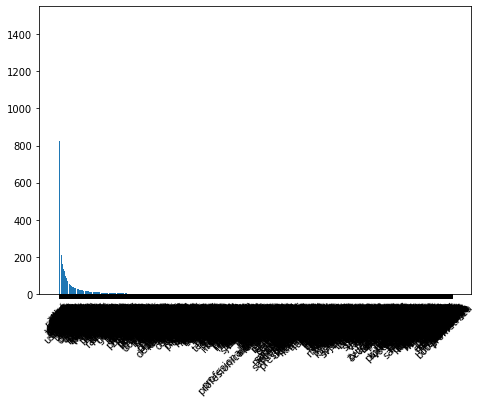

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(nouns.index, nouns.values)
plt.xticks(rotation=45)

In [ ]:
verbs = df_unique_lemmas[(df_unique_lemmas.upos=="VERB")]["lemma"].value_counts()[0:20]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

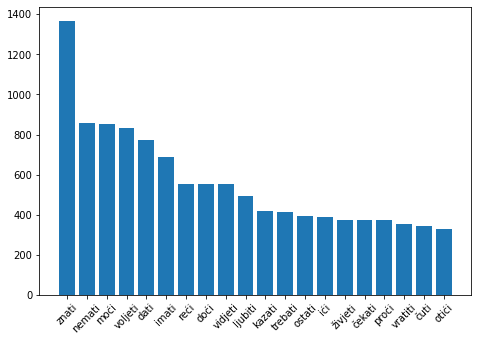

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(verbs.index, verbs.values)
plt.xticks(rotation=45)

In [ ]:
adjectives = df_unique_lemmas[(df_unique_lemmas.upos=="ADJ")]["lemma"].value_counts()[0:20]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

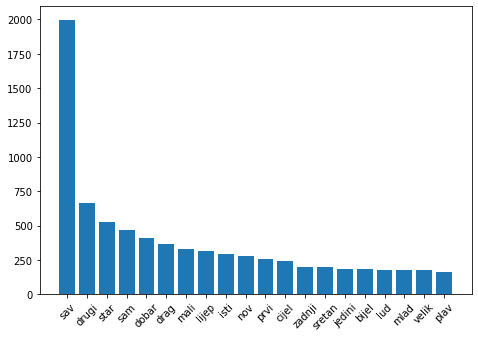

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(adjectives.index, adjectives.values)
plt.xticks(rotation=45)

In [ ]:
df_unique_lemmas[(df_unique_lemmas.upos=="ADJ") & (df_unique_lemmas.lemma=="sav")]

,id,text,lemma,upos,xpos,feats,head,deprel,misc,ner,Song,Song_ID,Degree,Case,Number,Person,PronType,Mood,Tense,VerbForm,Gender,Number[psor],Poss,Definite,Polarity,Reflex,Voice,Foreign,NumType,Animacy,Gender[psor]
154,12,svi,sav,ADJ,Agpmpny,Case=Nom|Definite=Def|Degree=Pos|Gender=Masc|N...,13,amod,NaN,O,Adios amor,zT3Xu5sD_1_1,Pos,Nom,Plur,NaN,NaN,NaN,NaN,NaN,Masc,NaN,NaN,Def,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,8,sve,sav,ADJ,Agpnsay,Case=Acc|Definite=Def|Degree=Pos|Gender=Neut|N...,6,obj,SpaceAfter=No,O,Ako me ostaviš,zT3Xu5sD_1_2,Pos,Acc,Sing,NaN,NaN,NaN,NaN,NaN,Neut,NaN,NaN,Def,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,7,sve,sav,ADJ,Agpmpay,Case=Acc|Definite=Def|Degree=Pos|Gender=Masc|N...,8,amod,NaN,O,Bez rastanka suza nema,zT3Xu5sD_1_5,Pos,Acc,Plur,NaN,NaN,NaN,NaN,NaN,Masc,NaN,NaN,Def,NaN,NaN,NaN,NaN,NaN,NaN,NaN
682,6,sve,sav,ADJ,Agpnsny,Case=Nom|Definite=Def|Degree=Pos|Gender=Neut|N...,19,nsubj,NaN,O,Bijela lađa,zT3Xu5sD_1_6,Pos,Nom,Sing,NaN,NaN,NaN,NaN,NaN,Neut,NaN,NaN,Def,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864,3,sva,sav,ADJ,Agpfsny,Case=Nom|Definite=Def|Degree=Pos|Gender=Fem|Nu...,4,amod,SpaceAfter=No,O,Bili ! Bili !,zT3Xu5sD_1_7,Pos,Nom,Sing,NaN,NaN,NaN,NaN,NaN,Fem,NaN,NaN,Def,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471214,2,sve,sav,ADJ,Agpnsny,Case=Nom|Definite=Def|Degree=Pos|Gender=Neut|N...,4,nsubj,NaN,O,Vise me nece,vmjQPyJ5_1_109,Pos,Nom,Sing,NaN,NaN,NaN,NaN,NaN,Neut,NaN,NaN,Def,NaN,NaN,NaN,NaN,NaN,NaN,NaN
471433,5,sve,sav,ADJ,Agpnsny,Case=Nom|Definite=Def|Degree=Pos|Gender=Neut|N...,6,nsubj,NaN,O,Vjerujem u tebe,vmjQPyJ5_1_111,Pos,Nom,Sing,NaN,NaN,NaN,NaN,NaN,Neut,NaN,NaN,Def,NaN,NaN,NaN,NaN,NaN,NaN,NaN
471599,2,sve,sav,ADJ,Agpfpay,Case=Acc|Definite=Def|Degree=Pos|Gender=Fem|Nu...,5,amod,NaN,O,Za sve one divne žene,vmjQPyJ5_1_113,Pos,Acc,Plur,NaN,NaN,NaN,NaN,NaN,Fem,NaN,NaN,Def,NaN,NaN,NaN,NaN,NaN,NaN,NaN
471740,2,svim,sav,ADJ,Agpfpiy,Case=Ins|Definite=Def|Degree=Pos|Gender=Fem|Nu...,5,amod,NaN,O,Za tebe se borim,vmjQPyJ5_1_114,Pos,Ins,Plur,NaN,NaN,NaN,NaN,NaN,Fem,NaN,NaN,Def,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_unique_lemmas[(df_unique_lemmas.upos=="ADJ") & (df_unique_lemmas.lemma=="star")]

,id,text,lemma,upos,xpos,feats,head,deprel,misc,ner,Song,Song_ID,Degree,Case,Number,Person,PronType,Mood,Tense,VerbForm,Gender,Number[psor],Poss,Definite,Polarity,Reflex,Voice,Foreign,NumType,Animacy,Gender[psor]
802,5,stare,star,ADJ,Agpfsgy,Case=Gen|Definite=Def|Degree=Pos|Gender=Fem|Nu...,4,nmod,SpaceAfter=No,O,Bili ! Bili !,zT3Xu5sD_1_7,Pos,Gen,Sing,NaN,NaN,NaN,NaN,NaN,Fem,NaN,NaN,Def,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1399,7,stara,star,ADJ,Agpfsny,Case=Nom|Definite=Def|Degree=Pos|Gender=Fem|Nu...,5,amod,NaN,O,Čuvajte mi pismu,zT3Xu5sD_1_11,Pos,Nom,Sing,NaN,NaN,NaN,NaN,NaN,Fem,NaN,NaN,Def,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1885,14,Stare,star,ADJ,Agpfpny,Case=Nom|Definite=Def|Degree=Pos|Gender=Fem|Nu...,15,amod,NaN,O,Dalmaciju dišem misto zraka,zT3Xu5sD_1_16,Pos,Nom,Plur,NaN,NaN,NaN,NaN,NaN,Fem,NaN,NaN,Def,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2131,4,staru,star,ADJ,Agpfsay,Case=Acc|Definite=Def|Degree=Pos|Gender=Fem|Nu...,3,amod,SpaceAfter=No,O,Dalmatinac,zT3Xu5sD_1_17,Pos,Acc,Sing,NaN,NaN,NaN,NaN,NaN,Fem,NaN,NaN,Def,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3934,3,stara,star,ADJ,Agpfsny,Case=Nom|Definite=Def|Degree=Pos|Gender=Fem|Nu...,4,amod,NaN,O,Herceg-Bosna (To je zemlja gdje zive Hrvati),zT3Xu5sD_1_28,Pos,Nom,Sing,NaN,NaN,NaN,NaN,NaN,Fem,NaN,NaN,Def,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469026,16,stara,star,ADJ,Agpfsny,Case=Nom|Definite=Def|Degree=Pos|Gender=Fem|Nu...,17,amod,NaN,O,Srebro,vmjQPyJ5_1_93,Pos,Nom,Sing,NaN,NaN,NaN,NaN,NaN,Fem,NaN,NaN,Def,NaN,NaN,NaN,NaN,NaN,NaN,NaN
469326,10,starom,star,ADJ,Agpmsly,Case=Loc|Definite=Def|Degree=Pos|Gender=Masc|N...,8,obl,SpaceAfter=No,O,Sunce na zapadu,vmjQPyJ5_1_96,Pos,Loc,Sing,NaN,NaN,NaN,NaN,NaN,Masc,NaN,NaN,Def,NaN,NaN,NaN,NaN,NaN,NaN,NaN
469453,8,stara,star,ADJ,Agpfsny,Case=Nom|Definite=Def|Degree=Pos|Gender=Fem|Nu...,9,amod,NaN,O,Suvenir,vmjQPyJ5_1_97,Pos,Nom,Sing,NaN,NaN,NaN,NaN,NaN,Fem,NaN,NaN,Def,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470815,5,starog,star,ADJ,Agpnsgy,Case=Gen|Definite=Def|Degree=Pos|Gender=Neut|N...,6,amod,NaN,O,U tvojim očima,vmjQPyJ5_1_107,Pos,Gen,Sing,NaN,NaN,NaN,NaN,NaN,Neut,NaN,NaN,Def,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df.lemma=="vojska"].Song.unique()

array(['Tajno ime', 'Kao nas dvoje', 'Nepobjediva', 'Udica',
       'Niti kunem, niti molim', 'E moj narode', 'Zadnja Suza', 'Hrast',
       'Zagreb ima isti pozivni', 'Izvini, jaro, guzim',
       'Ljubav udari često tamo gdje ne treba', '7 milja iznad mora',
       'Dida', 'Di se skrila Slavonija', 'Mlada vojska hrvatska',
       'Ovim su sorom', 'Ružo snena'], dtype=object)

In [ ]:
df[df.lemma=="Slavonija"].Song_ID.unique()

array(['zT3Xu5sD_1_27', 'wNGUjqQ7_1_73', 'b1GNJHQO_1_11', 'Wm5tG4b5_1_34',
       'Wal+tKVc_1_1', 'O93DTxfd_1_65', 'CXljSNTE_1_2', 'CXljSNTE_1_20',
       'CXljSNTE_1_24', 'CXljSNTE_1_32', 'CXljSNTE_1_33', 'CDOhygHn_1_34',
       'CDOhygHn_1_92', 'CDOhygHn_1_148', 'CDOhygHn_1_151',
       'CDOhygHn_1_152', 'CDOhygHn_1_153', 'CDOhygHn_1_154',
       'CDOhygHn_1_155', 'CDOhygHn_1_165', 'CDOhygHn_1_207',
       '0X3VJo7g_1_102', 'vpm1INqf_1_22', 'vpm1INqf_1_30',
       'vpm1INqf_1_53', '+RXzsM0Y_1_38', 'r01Z81Es_1_2', 'r01Z81Es_1_22'],
      dtype=object)

In [ ]:
for song_id in df[df.lemma=="vino"].Song_ID.unique():
  print(song_id)
  print(df_lyrics.Song[df_lyrics.Song_ID==song_id].values)
  print(df_lyrics.Lyrics[df_lyrics.Song_ID==song_id].reset_index(drop=True)[0])

zT3Xu5sD_1_2
['Ako me ostaviš']
Samo jednom ljubav pokuca na vrata, Da te rani čežnjom i gorčinom, Da te vodi ko' pticu bez jata, Da te tješi vinom. Samo jednom ljubav pokuca na vrata, Da ti pruži snove i ljepotu, Da ti stavi okove od zlata, Jednom u životu... Ako me ostaviš, kad poželiš kraj, I nebo će plakati, izgubit će sjaj. Ako me ostaviš, ne ruši drugo sve, Pusti da vjerujem da voljela si me. Samo jednom ljubav pokuca na vrata, Da ti pruži snove i ljepotu, Da ti stavi okove od zlata, Jednom u životu... Ako me ostaviš, kad poželiš kraj, I nebo će plakati, izgubit će sjaj, Ako me ostaviš, ne ruši drugo sve, Pusti da vjerujem da voljela si me.
zT3Xu5sD_1_16
['Dalmaciju dišem misto zraka']
Tu di krila galebovi šire, Di se s nebom sastavilo more, Stare none preko škura vire, Cvate moja smokva tvrde kore. Ne virujem kada čujem priče, Sve je teže, nije više isto, Kraj komina prva slova sriče, Malo dite Dalmaciju piše. Di sam korak naparvija prvi. Još me vuče ista želja jaka, Samo more t

In [ ]:
df_lyrics.Lyrics[df_lyrics.Song_ID==song_id].reset_index(drop=True)[0]

"Isa' san na kraj svita, nosija me morski val, al' me uvik kuci vraca, jadranski maestral. Vidija san cuda svita, nosija me bili brod, al' me srce kuci vuce, di je mater, di je dom. Dalmaciju more ljubi. Zagorje je dusa tvoja. Lika, Istra tvoje cvice, nalipsa si, zemljo moja. Dalmaciju more ljubi. Slavonijo, zlatna polja, ne dam ovaj kamen sivi, ovdi rastu dica tvoja, ne dam ovaj kamen sivi, najlipsa si, zemljo moja. Vidija sam cuda svita, nosija me bili brod, al' me srce uvik vuce, di je mater, di je dom"